In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [3]:
ls crime_data_raw/2011

apr11.xls*  dec11.xls*  jan11.xls*  jun11.xls*  may11.xls*  oct11.xls*
aug11.xls*  feb11.xls*  jul11.xls*  mar11.xls*  nov11.xls*  sep11.xls*


In [4]:
path = 'crime_data_raw/2011'

In [5]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [6]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [8]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date             127659 non-null datetime64[ns]
Hour             127659 non-null int64
Offense Type     127659 non-null object
Beat             127659 non-null object
Premise          127659 non-null object
Block Range      127659 non-null object
Street Name      127659 non-null object
Type             127659 non-null object
Suffix           127659 non-null object
# Of Offenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [10]:
df[df.Date.isnull()]

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses


## Inspect Premise col

In [11]:
len(df.Premise.value_counts(dropna=False))

127

In [12]:
df.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

In [13]:
df.Premise.unique()

array(['20A', '20R', '18N', '20D', '13R', '11R', '250', '18O', '20P',
       '22H', '20W', '09H', '22M', '140', '13S', '18A', '240', '03B',
       '100', '20V', '20C', '09R', '01P', '120', '18C', '13H', '18B',
       '070', '18G', '05Z', '080', '20G', '23S', '05M', '18T', '02B',
       '18L', '05O', '05X', '18R', '13B', '24E', '18U', '05C', '210',
       '09D', '05B', '20M', '18P', '18W', '24C', '18S', '02S', '160',
       '01K', '05E', '040', '24P', '05D', '05P', '18M', '05Q', '170',
       '22P', '05L', '18H', '03S', '22E', '05R', '11G', '25R', '05H',
       '13A', '150', '05S', '01B', '22D', '12V', '060', '24V', '05V',
       '190', '05G', '25V', '05F', '05N', '05Y', '09P', '19V', '24T',
       '11L', '05W', '04V', '11F', '22C', '11S', '05T', '24J', '24F',
       '20L', '21V', '24A', '---', '20N', '24S', '22U', '11P', '22V',
       '05U', '01A', '01R', '05A', '18D', '11C', '13T', '24G', '20H',
       '14V', '11V', '23C', '02C', '01T', '24B', '09V', '24M', '06', 'N'],
      dtype=obj

In [14]:
df.Premise = df.Premise.str.strip()

In [15]:
len(df.Premise.value_counts(dropna=False))

127

In [16]:
df.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

In [17]:
# check if  null values
df.isnull().values.any().any()

False

In [18]:
# check su, of null values
df.isnull().values.sum()

0

In [19]:
len(df[df.isnull().any(axis=1)])

0

## Visualize our data

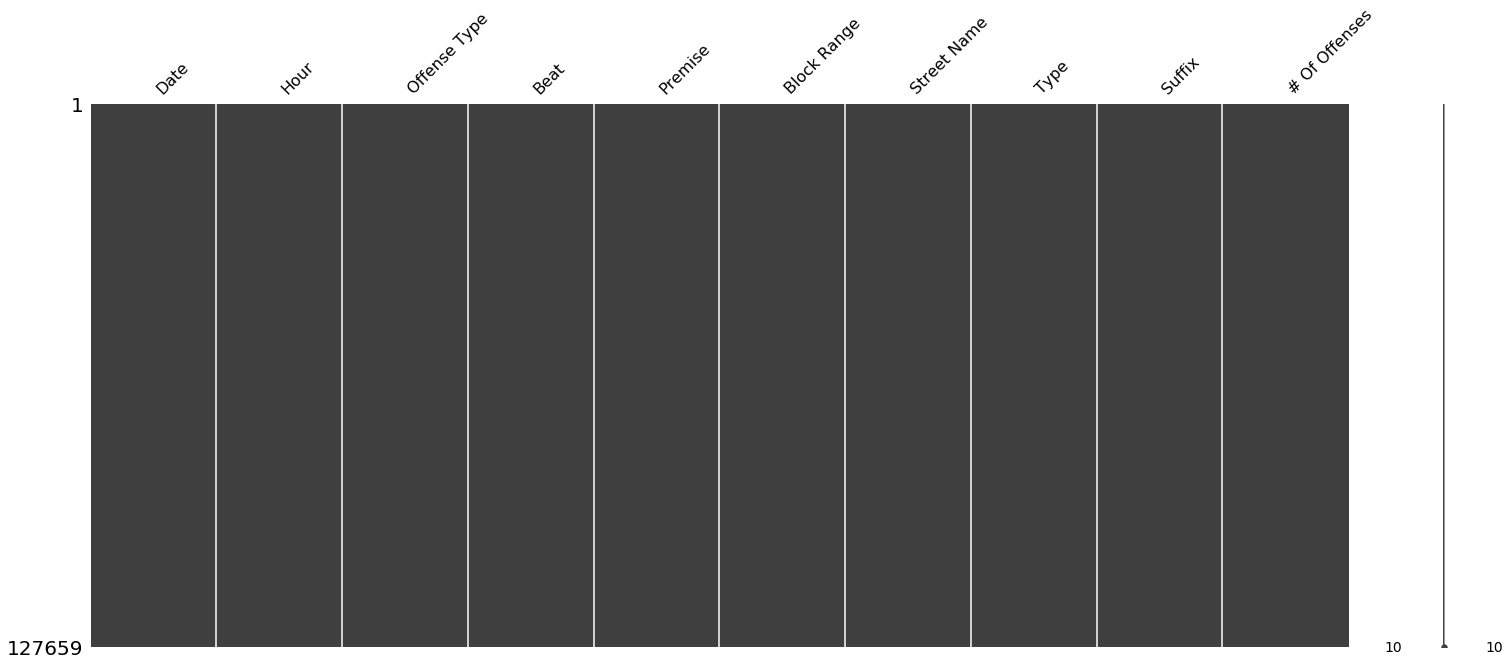

In [20]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [21]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [22]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [23]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [24]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [25]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date           127659 non-null datetime64[ns]
Hour           127659 non-null int64
OffenseType    127659 non-null object
Beat           127659 non-null object
Premise        127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
Type           127659 non-null object
Suffix         127659 non-null object
NumOffenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


## Subset dataframe to work on 

In [26]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 8 columns):
Date           127659 non-null datetime64[ns]
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null int64
Hour           127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.8+ MB


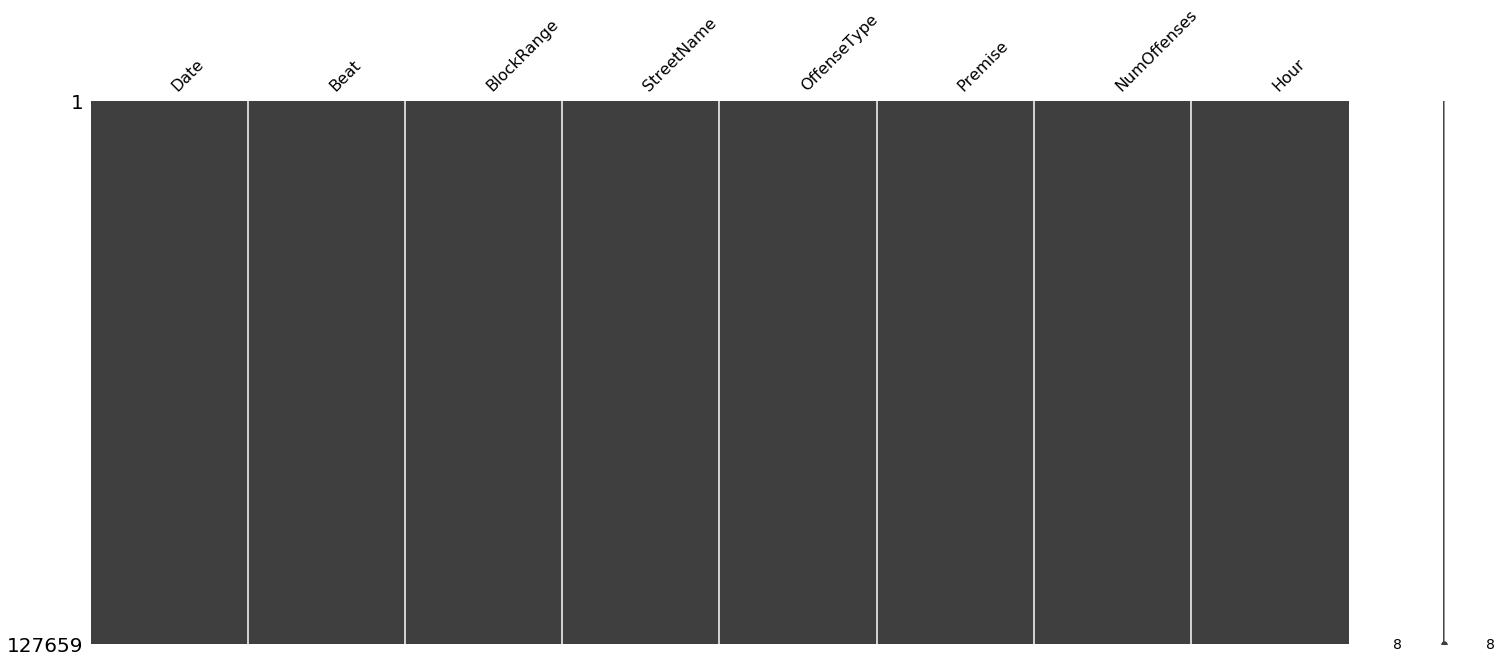

In [27]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [28]:
len(crimes[crimes.Date.isnull()])

0

In [29]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [30]:
len(crimes[crimes.Beat.isnull()])

0

In [31]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [32]:
len(crimes[crimes.BlockRange.isnull()])

0

In [33]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [34]:
len(crimes[crimes.StreetName.isnull()])

0

In [35]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [36]:
len(crimes[crimes.OffenseType.isnull()])

0

In [37]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [38]:
len(crimes[crimes.Premise.isnull()])

0

In [39]:
crimes[crimes.Premise.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [40]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [41]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [42]:
len(crimes[crimes.Hour.isnull()])

0

In [43]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN in rows and delete
- drop if > 2 nan

In [44]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [45]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [46]:
#crimes = crimes.dropna(thresh=2)

In [47]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [48]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127662 entries, 0 to 127661
Data columns (total 9 columns):
Date                   127659 non-null datetime64[ns]
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127662 non-null object
NumOffenses            127659 non-null float64
Hour                   127659 non-null float64
Premise Description    127574 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.7+ MB


In [49]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2011-04-13,17E40,6400-6499,BANKSIDE,Murder,20A,1.0,1.0,APARTMENT
1,2011-04-06,20G30,2900-2999,HAYES,Murder,20A,1.0,14.0,APARTMENT
2,2011-04-17,11H20,2500-2599,BROADWAY,Murder,20A,1.0,23.0,APARTMENT
3,2011-04-21,17E10,5900-5999,BELLAIRE,Rape,20A,1.0,15.0,APARTMENT
4,2011-04-10,17E40,12500-12599,DUNLAP,Rape,20A,1.0,20.0,APARTMENT


In [50]:
len(crimes[crimes['Premise Description'].isnull()])

88

In [51]:
crimes[crimes['Premise Description'].isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
126699,2011-04-20,19G10,10800-10899,BEECHNUT,Auto Theft,---,1.0,18.0,NaN
126700,2011-04-15,20G30,10400-10499,RICHMOND,Theft,---,1.0,11.0,NaN
126701,2011-05-07,1A10,1200-1299,TRAVIS,Rape,---,1.0,15.0,NaN
126702,2011-05-01,20G10,9900-9999,RICHMOND,Theft,---,1.0,0.0,NaN
126703,2011-08-15,19G10,6800-6899,WEST SAM HOUSTON,Theft,---,1.0,19.0,NaN


## Problem
- find nan values on one col, and copy related col

In [52]:
crimes.Premise.unique()

array(['20A', '20R', '18N', '20D', '13R', '11R', '250', '18O', '20P',
       '22H', '20W', '09H', '22M', '140', '13S', '18A', '240', '03B',
       '100', '20V', '20C', '09R', '01P', '120', '18C', '13H', '18B',
       '070', '18G', '05Z', '080', '20G', '23S', '05M', '18T', '02B',
       '18L', '05O', '05X', '18R', '13B', '24E', '18U', '05C', '210',
       '09D', '05B', '20M', '18P', '18W', '24C', '18S', '02S', '160',
       '01K', '05E', '040', '24P', '05D', '05P', '18M', '05Q', '170',
       '22P', '05L', '18H', '03S', '22E', '05R', '11G', '25R', '05H',
       '13A', '150', '05S', '01B', '22D', '12V', '060', '24V', '05V',
       '190', '05G', '25V', '05F', '05N', '05Y', '09P', '19V', '24T',
       '11L', '05W', '04V', '11F', '22C', '11S', '05T', '24J', '24F',
       '20L', '21V', '24A', '---', '20N', '24S', '22U', '11P', '22V',
       '05U', '01A', '01R', '05A', '18D', '11C', '13T', '24G', '20H',
       '14V', '11V', '23C', '02C', '01T', '24B', '09V', '24M', '06', 'N',
       '02V', '1

In [53]:
len(crimes[crimes['Premise'] == '---'])

84

In [54]:
len(crimes[crimes['Premise'] == 'N'])

1

In [55]:
crimes[crimes['Premise'] == 'N']

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
127658,2011-10-28,5F30,7500-7599,LANGTRY,Theft,N,1.0,0.0,NaN


In [56]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [57]:
len(crimes[crimes['Premise Description'].isnull()])

0

In [58]:
crimes[crimes['Premise'] == 'N'].head()


,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
127658,2011-10-28,5F30,7500-7599,LANGTRY,Theft,N,1.0,0.0,N


## Visualize data

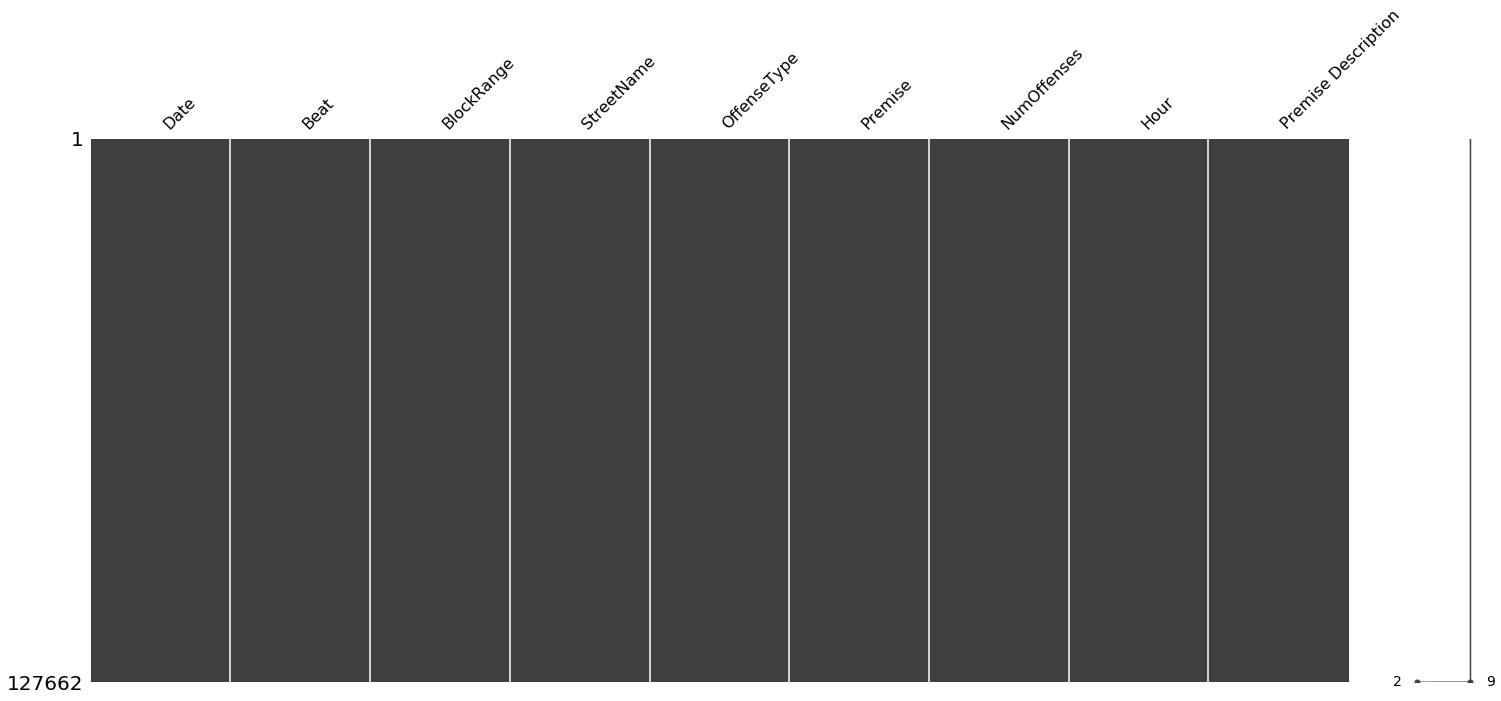

In [59]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [60]:
len(crimes[crimes.isnull().any(axis=1)])

3

In [61]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
127659,NaT,NaN,NaN,NaN,NaN,02V,NaN,NaN,VACANT BANK
127660,NaT,NaN,NaN,NaN,NaN,13C,NaN,NaN,CONTRA-FLOW/HOV
127661,NaT,NaN,NaN,NaN,NaN,15V,NaN,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [62]:
crimes = crimes.dropna(thresh=3)

In [63]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [64]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Inspect each column

In [65]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [66]:
len(crimes.Beat.value_counts())

121

In [67]:
len(crimes.Beat.value_counts(dropna=False))

121

In [68]:
crimes.Beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [69]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [70]:
len(crimes.Beat.value_counts(dropna=False))

121

In [71]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [72]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [73]:
crimes.Beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [74]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3029
12D10    2761
6B60     2717
3B10     2578
13D20    2390
Name: Beat, dtype: int64

## BlockRange

In [75]:
len(crimes.BlockRange.value_counts(dropna=False))

254

In [76]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1731
100-199      1638
800-899      1631
9400-9499    1603
700-799      1601
Name: BlockRange, dtype: int64

In [77]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [78]:
len(crimes.BlockRange.value_counts(dropna=False))

254

## StreetName

In [79]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7537


In [80]:
crimes.StreetName = crimes.StreetName.str.strip()

In [81]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7537


In [82]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3587
GESSNER       1846
GULF          1801
NORTH         1763
RICHMOND      1713
Name: StreetName, dtype: int64


## OffenseType

In [83]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [84]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [85]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [86]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: OffenseType, dtype: int64


## Premise

In [87]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:127


In [88]:
crimes.Premise = crimes.Premise.str.strip()

In [89]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [90]:
crimes.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

## Premise Description

In [91]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:127


In [92]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [93]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:127


In [94]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17514
RESIDENCE/HOUSE          17271
APARTMENT PARKING LOT    13946
ROAD/STREET/SIDEWALK      8758
DRIVEWAY                  7690
Name: Premise Description, dtype: int64


# Set Date as index

In [95]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [96]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,5.0,OTHER PARKING LOT
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,23.0,HOSPITAL
1966-10-27,6B50,10300-10399,NORTH,Theft,210,1.0,0.0,RESTAURANT/CAFETERIA
1970-11-27,19G50,10200-10299,LANDS END,Theft,250,1.0,13.0,OTHER/UNKNOWN
1971-08-16,14D20,9000-9099,BRANDON,Theft,20D,1.0,22.0,DRIVEWAY


## Create Columns with day,weekday,month,year from date index

In [97]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [98]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,5.0,OTHER PARKING LOT,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,23.0,HOSPITAL,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,210,1.0,0.0,RESTAURANT/CAFETERIA,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,250,1.0,13.0,OTHER/UNKNOWN,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,20D,1.0,22.0,DRIVEWAY,16,Monday,Aug,1971


## null values

- check
- count
- display

In [99]:
crimes.isnull().values.any().any()

False

In [100]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [101]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [102]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 to 2011-12-31
Data columns (total 12 columns):
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127659 non-null object
NumOffenses            127659 non-null float64
Hour                   127659 non-null float64
Premise Description    127659 non-null object
day                    127659 non-null object
weekday                127659 non-null object
month                  127659 non-null object
year                   127659 non-null object
dtypes: float64(2), object(10)
memory usage: 15.2+ MB


## New Dataframe
- remove premise col
- keep premise description

In [103]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22.0,16,Monday,Aug,1971


In [104]:
crime_yr.isnull().values.any().any()

False

In [105]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [106]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


# FIND NANS

## INDEX

In [107]:
len(crime_yr[crime_yr.index.isnull()])

0

In [108]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [109]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1964-10-09', '1965-03-20', '1966-10-27', '1970-11-27',
               '1971-08-16', '1972-02-09', '1972-10-20', '1976-04-15',
               '1977-12-17', '1978-06-29',
               ...
               '2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2011-12-31', '2011-12-31'],
              dtype='datetime64[ns]', name='Date', length=127659, freq=None)

In [110]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [111]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [112]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [113]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [114]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [115]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [116]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [117]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [118]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [119]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## OffenseType

In [120]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [121]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Hour

In [122]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [123]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie Description

In [124]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [125]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [126]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [128]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [129]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [130]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [131]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 to 2011-12-31
Data columns (total 11 columns):
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null float64
Hour           127659 non-null float64
day            127659 non-null object
weekday        127659 non-null object
month          127659 non-null object
year           127659 non-null object
dtypes: float64(2), object(9)
memory usage: 11.7+ MB


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [132]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22.0,16,Monday,Aug,1971


In [133]:
ls crime_data_clean/new

Final_crime10_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*
Final_crime13_clean.csv*  Final_crime16_clean.csv*


In [134]:
crime_yr.to_csv('crime_data_clean/new/Final_crime11_clean.csv')

In [135]:
ls crime_data_clean/new

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*
